In [1]:
# setting up dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# file path
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# csv reader
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# showing the dfs individually to see how they merge
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# merging the dfs on "Mouse ID" and a left join. data cleaning to follow.
merge_mouse_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# shows the actual count of mice in the study
mouse_count = merge_mouse_df["Mouse ID"].nunique()
mouse_count

249

In [7]:
# locating the Mouse ID with duplicate Timepoints
mouse_duplicate = merge_mouse_df.loc[merge_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_duplicate

array(['g989'], dtype=object)

In [8]:
# displaying the duplicate values 
mouse_dupes = merge_mouse_df[merge_mouse_df['Mouse ID'].isin(mouse_duplicate)]
mouse_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
mouse_clean = merge_mouse_df[merge_mouse_df['Mouse ID'] != 'g989'].copy()
mouse_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
mouse_nunique = mouse_clean["Mouse ID"].nunique()
mouse_nunique

248

Summary Statistics

In [11]:
mean = mouse_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = mouse_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = mouse_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stdv = mouse_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
ster = mouse_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [12]:
mouse_summary_stats = pd.DataFrame(
    {
        "Mean Tumor Volume" : mean,
        "Median Tumor Volume" : median,
        "Tumor Volume Variance" : variance,
        "Tumor Volume Std. Dev" : stdv,
        "Tumor Volume Std. Err." : ster
        
    }
)

mouse_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
mouse_aggregate = mouse_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})
mouse_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts

In [14]:
# making the variable(s) to plot the number of timepoints for each drug regimen
timepoint_group = mouse_clean.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoint_group

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

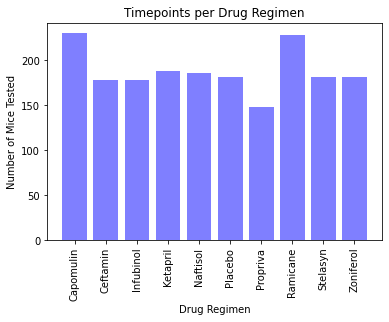

In [15]:
# bar chart showing the total number of timepoints for all mice tested grouped by Drug Regimen using pyplot
plt.bar(timepoint_group.index, timepoint_group, color="blue", alpha=.5)
plt.xticks(timepoint_group.index, rotation="vertical")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

Text(0, 0.5, 'Number of Mice Tested')

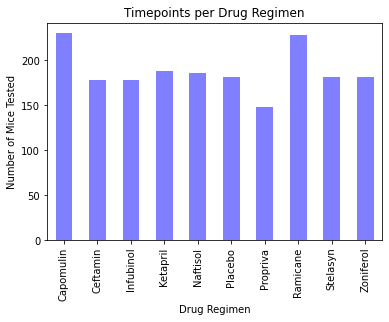

In [16]:
# same bar chart using pandas
timepoint_group.plot(kind="bar", color="blue", alpha=.5)
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

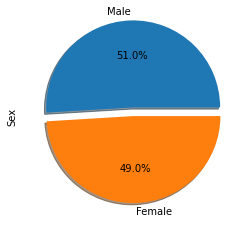

In [17]:
# pie chart showing the the distribution of female versus male mice using pyplot
sex_count = mouse_clean["Sex"].value_counts()
explode = (0.1, 0)
plt.pie(sex_count.values, labels=sex_count.index, explode = explode, autopct='%1.1f%%', 
        shadow=True, startangle=0)
# plt.ylabel used to match the starter code image
plt.ylabel("Sex")
# plt.title("Sex", pad=30)
# plt.axis("equal")
plt.show()

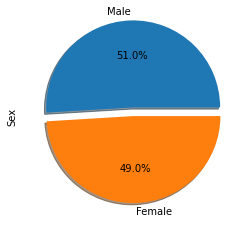

In [18]:
# same pie chart using pandas
sex_count.plot(kind="pie", explode = explode, autopct='%1.1f%%', 
        shadow=True, startangle=0)
plt.show()

In [19]:
# grabbing the max timepoint for each mouse ID to locate the greatest tumor volume

max_timepoint = mouse_clean.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()

In [20]:
# merging the max timepoint list with the original df 

merge_timepoint = max_timepoint.merge(mouse_clean, on=["Mouse ID", "Timepoint"], how="left")
merge_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []

# for loop to grab the tumor volumes and quaritle ranges for each of the four drugs
for drug in regimens:
    final_tumor_vol = merge_timepoint.loc[merge_timepoint["Drug Regimen"] == drug, 
                                          'Tumor Volume (mm3)']
    tumor_volume.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}'s' potential outliers: <{lower_bound} and >{upper_bound}")


Capomulin's' potential outliers: <20.70456164999999 and >51.83201549
Ramicane's' potential outliers: <17.912664470000003 and >54.30681135
Infubinol's' potential outliers: <36.83290494999999 and >82.74144559000001
Ceftamin's' potential outliers: <25.355449580000002 and >87.66645829999999


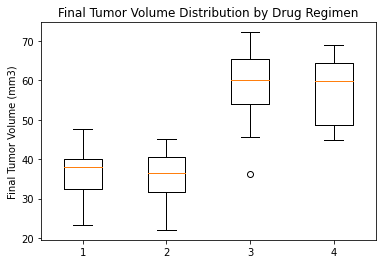

In [22]:
# boxplot showing the distribution of tumor volumes for each treatment group
plt.boxplot(tumor_volume)
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                   linestyle='none', markeredgecolor='g')
plt.title("Final Tumor Volume Distribution by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
# tick_locations = [value for value in tumor_volume]
# plt.xticks({"Capomulin", "Ramicane", "Infubinol", "Ceftamin"})
plt.show()

Line and Scatter Plots

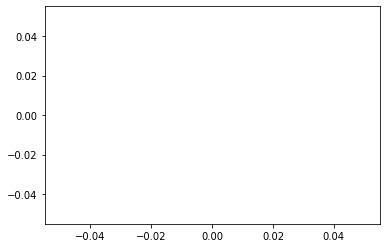

In [25]:
# line plot showing the tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_study = mouse_clean.loc[mouse_clean["Drug Regimen"] == "Capomulin"]
one_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "I509"]

plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"])
plt.show()

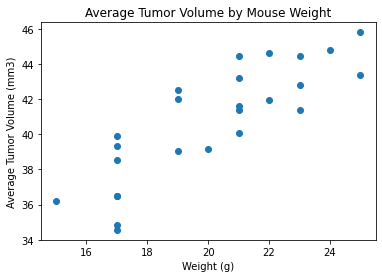

In [26]:
# scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_study.groupby("Mouse ID").mean()
# capomulin_gb = capomulin_study.groupby("Mouse ID")
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

plt.title("Average Tumor Volume by Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.show()

Correlation and Regression

In [27]:
x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'linregress' is not defined